In [6]:
%run setup.py

In [7]:
sample = pd.read_csv('../data/EBs_data.csv')

In [8]:
sample

,index,KIC,ifsplitting,ifmodelling,ifsupressed,comments,stage,names,_RA,_DE,...,fDnu,e_fDnu,radius_sc,e_radius_sc,mass_sc,e_mass_sc,radius_scf,e_radius_scf,mass_scf,e_mass_scf
0,1338,4663623,NaN,1,NaN,NaN,rgb,binary,294.19873,39.75800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1339,5640750,NaN,1,NaN,NaN,rgb,binary,297.20180,40.89244,...,0.957238,0.010715,14.011248,0.716451,1.355097,0.206856,13.176000,0.673742,1.198350,0.182929
2,1340,5786154,NaN,1,NaN,NaN,rgb,binary,290.25590,41.01804,...,0.953500,0.005726,12.112048,0.624323,1.280331,0.197032,11.668458,0.601458,1.188266,0.182864
3,1341,7037405,NaN,1,NaN,NaN,rgb,binary,292.97623,42.54768,...,0.952346,0.004372,14.125071,0.723697,1.239473,0.189583,13.192457,0.675915,1.081203,0.165375
4,1344,8410637,NaN,1,NaN,NaN,rgb,binary,282.15872,44.48607,...,0.959934,0.005198,10.810694,0.555439,1.569127,0.240685,10.483869,0.538647,1.475686,0.226352
5,1345,8430105,NaN,1,NaN,NaN,rgb,binary,291.55862,44.48819,...,0.968118,0.021044,8.083416,0.411499,1.515224,0.230261,7.785772,0.396347,1.405693,0.213616
6,1346,9153621,NaN,1,NaN,NaN,rgb,binary,291.41193,45.53519,...,0.958738,0.013726,10.751984,0.583421,1.297961,0.210370,10.282703,0.557957,1.187132,0.192407
7,1348,9540226,NaN,1,NaN,NaN,rgb,binary,297.03400,46.19847,...,0.956731,0.005078,13.404109,0.685979,1.416698,0.216442,12.736773,0.651826,1.279147,0.195427
8,1349,9970396,NaN,1,NaN,NaN,rgb,binary,298.70980,46.83303,...,0.962727,0.005604,8.321124,0.425416,1.309218,0.199816,8.008131,0.409414,1.212579,0.185067
9,1350,10001167,NaN,1,NaN,NaN,rgb,binary,286.95575,46.93662,...,0.953857,0.013925,13.487773,0.687123,1.056751,0.160709,12.645098,0.644194,0.928831,0.141255


0

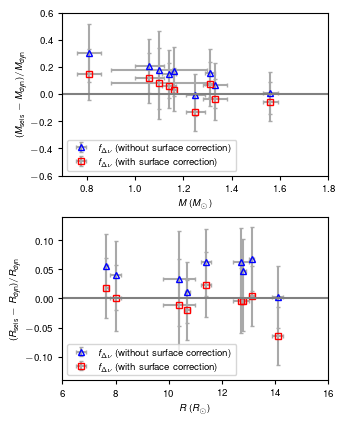

In [9]:
### from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, axes = plt.subplots(figsize=mnras_size(column='one', ratio=0.618*2), nrows=2, ncols=1, squeeze=False, constrained_layout=True)
axes = axes.reshape(-1)

styles1 = {'mfc':'none', 'mec':'b', 'ecolor':'darkgray', 'ms':5, 'capsize':1.5, 'zorder':-1, 
                     'linestyle':'none', 'marker':'^'}
styles2 = {'mfc':'none', 'mec':'r', 'ecolor':'darkgray', 'ms':5, 'capsize':1.5, 'zorder':-1, 
                     'linestyle':'none', 'marker':'s'}

rows = ['sc', 'scf']
cols = ['mass', 'radius']
irow = 0
for icol in range(2):
    col = cols[icol]
    x, ex = sample['{:s}_dyn'.format(col)].to_numpy(), sample['e_{:s}_dyn'.format(col)].to_numpy()
    y1, ey1 = sample['{:s}_{:s}'.format(col, 'sc')].to_numpy(), sample['e_{:s}_{:s}'.format(col, 'sc')].to_numpy()
    y2, ey2 = sample['{:s}_{:s}'.format(col, 'scf')].to_numpy(), sample['e_{:s}_{:s}'.format(col, 'scf')].to_numpy()

    fy1 = (y1-x)/x
    efy1 = (fy1+1) * ((ey1/y1)**2.0 + (ex/x)**2.0 )**0.5
    fy2 = (y2-x)/x
    efy2 = (fy2+1) * ((ey2/y2)**2.0 + (ex/x)**2.0 )**0.5
    axes[icol].errorbar(x, fy1, xerr=ex, yerr=efy1, 
                     label='$f_{\\Delta\\nu}$ (without surface correction)', **styles1)
    axes[icol].errorbar(x, fy2, xerr=ex, yerr=efy2, 
                     label='$f_{\\Delta\\nu}$ (with surface correction)', **styles2)

    if icol==0: # mass col
        axes[icol].axis([0.7, 1.8, -0.6, 0.6])
        axes[icol].axhline(0., linestyle='-', color='gray')
        axes[icol].set_ylabel('$(M_{\\rm seis}-M_{\\rm dyn})/M_{\\rm dyn}$')
        axes[icol].set_xlabel('$M$ ($M_\\odot$)')
        axes[icol].legend(loc='lower left', fontsize=fontsize)
    else: # radius col
        axes[icol].axis([6, 16, -0.14, 0.14])
        axes[icol].axhline(0., linestyle='-', color='gray')
        axes[icol].set_ylabel('$(R_{\\rm seis}-R_{\\rm dyn})/R_{\\rm dyn}$')
        axes[icol].set_xlabel('$R$ ($R_\\odot$)')
        axes[icol].legend(loc='lower left', fontsize=fontsize)
        
filename = 'Fig.10_EBs.pdf'

plt.savefig(filename)
os.system(to_overleaf(filename, 'figures'))